# Anti-Cancer Peptide Analysis 

### a data research project by Alex Logan

# 1.) Introduction

In general terms, the purpose of this project is to determine how anti-cancer peptides may relate to fighting the common causes of cancer. While the information presented here will likely be of most usage to those in the medical community, I hope for the project to be understandable by all.
However, there are many types of cancer, and so for the time being this project's scope will be somewhat more limited (or if you prefer, focused), specifically to breast cancer. My datasets come from two sources: 

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data **for the breast cancer dataset**

and

https://archive.ics.uci.edu/dataset/589/anticancer+peptides

for the **anticancer peptides dataset,** the download actually includes datasets of peptides for two types of cancer, breast cancer and lung cancer. However, there wasn't a good way to involve the lung anticancer peptides with the project **in its current state**. *A goal for future research, then.*

The work involved in the project is two-fold: To examine the most common effects leading to breast cancer and also to examine the effiacy of peptides, with the ultimate goal being to **find the most effective anti-cancer solutions**. 

Bringing the two goals together into a cohesive sum requires a bit of thinking, and we'll get to that soon. For now, there is some work to do to make this data more usable.

# 2.) Data Loading (and IDA Part 1)

In [88]:
import pandas as pd

# Reading the CSV files into DataFrames
breastcancer = pd.read_csv('breastcancer.csv')
peptides_b = pd.read_csv('peptides_b.csv')

# Display the first few rows of each DataFrame to confirm
print(breastcancer.head())
print(peptides_b.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

For the purpoes of our analysis, one of the most important parts of the dataset is the class column, which categorizes peptides into four classes based on their activity levels:

Very Active: EC/IC/LD/LC50 ≤ 5 μM

Moderately Active: EC/IC/LD/LC50 ≤ 50 μM

Experimental Inactive

Virtual Inactive

Active peptides are those that are either Very Active or Moderately Active, as they show significant anticancer activity. This will be important soon!

In [89]:
# Identify columns with missing values in the breast cancer dataset
missing_breastcancer = breastcancer.isnull().sum()
missing_breastcancer = missing_breastcancer[missing_breastcancer > 0]  # Only show columns with missing values
print("Columns with missing values in breast cancer dataset:")
print(missing_breastcancer)

# Identify columns with missing values in the peptides dataset
missing_peptides_b = peptides_b.isnull().sum()
missing_peptides_b = missing_peptides_b[missing_peptides_b > 0]  # Only show columns with missing values
print("\nColumns with missing values in peptides_b dataset:")
print(missing_peptides_b)


Columns with missing values in breast cancer dataset:
Unnamed: 32    569
dtype: int64

Columns with missing values in peptides_b dataset:
Series([], dtype: int64)


In [90]:
# Check for duplicates in the breast cancer dataset
duplicates_breastcancer = breastcancer.duplicated().sum()
print(f"Number of duplicate rows in breast cancer dataset: {duplicates_breastcancer}")

# Check for duplicates in the peptides_b dataset
duplicates_peptides_b = peptides_b.duplicated().sum()
print(f"Number of duplicate rows in peptides_b dataset: {duplicates_peptides_b}")




Number of duplicate rows in breast cancer dataset: 0
Number of duplicate rows in peptides_b dataset: 0


In [91]:
from scipy import stats
import numpy as np

# Function to detect outliers using Z-score
def detect_outliers_zscore(df, threshold=3):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    z_scores = stats.zscore(df[numerical_cols])  # Calculate Z-scores
    abs_z_scores = np.abs(z_scores)  # Get absolute Z-scores
    outliers = (abs_z_scores > threshold)  # Mark outliers where Z-score > threshold
    return outliers.sum(axis=0)  # Return count of outliers in each column

# Z-score threshold (you can modify this threshold if needed)
z_threshold = 3

# Detect outliers in the breast cancer dataset
outliers_breastcancer = detect_outliers_zscore(breastcancer, threshold=z_threshold)
print(f"Outliers in breast cancer dataset (Z-score > {z_threshold}):")
print(outliers_breastcancer)

# Detect outliers in the peptides_b dataset
outliers_peptides_b = detect_outliers_zscore(peptides_b, threshold=z_threshold)
print(f"\nOutliers in peptides_b dataset (Z-score > {z_threshold}):")
print(outliers_peptides_b)


Outliers in breast cancer dataset (Z-score > 3):
id                         11
radius_mean                 5
texture_mean                4
perimeter_mean              7
area_mean                   8
smoothness_mean             5
compactness_mean            9
concavity_mean              9
concave points_mean         6
symmetry_mean               5
fractal_dimension_mean      7
radius_se                   7
texture_se                  9
perimeter_se                8
area_se                     6
smoothness_se               7
compactness_se             12
concavity_se                6
concave points_se           6
symmetry_se                11
fractal_dimension_se       10
radius_worst                6
texture_worst               4
perimeter_worst             6
area_worst                 10
smoothness_worst            3
compactness_worst          10
concavity_worst             7
concave points_worst        0
symmetry_worst              9
fractal_dimension_worst     9
Unnamed: 32          

Originally, this next part of the dataset observed **all** the columns of the breast cancer dataset, however, **the results weren't partiularly meaningful**, so for now it's only being shown for the **diagnosis** column.

In [92]:
# Function to check class imbalance
def check_class_imbalance(df, column):
    class_counts = df[column].value_counts()
    print(f"Class distribution in '{column}' column:")
    print(class_counts)
    print(f"\nClass imbalance ratio:\n{class_counts / len(df)}\n")
    
# Function to check value distribution for a specific column
def check_column_distribution(df, column):
    print(f"Distribution in '{column}' column:")
    print(df[column].value_counts(dropna=False))  # Include NaN values
    print(f"\nDistribution ratio for '{column}':")
    print(df[column].value_counts(normalize=True, dropna=False))  # Show proportions
    print("\n" + "-"*40 + "\n")  # Separator for clarity

# Check the distribution for the 'diagnosis' column in the breast cancer dataset
print("Breast cancer dataset diagnosis distribution:")
check_column_distribution(breastcancer, 'diagnosis')

# For the peptides_b dataset: 'class' column
print("Peptides_b dataset class imbalance:")
check_class_imbalance(peptides_b, 'class')


Breast cancer dataset diagnosis distribution:
Distribution in 'diagnosis' column:
diagnosis
B    357
M    212
Name: count, dtype: int64

Distribution ratio for 'diagnosis':
diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

----------------------------------------

Peptides_b dataset class imbalance:
Class distribution in 'class' column:
class
inactive - virtual    750
mod. active            98
inactive - exp         83
very active            18
Name: count, dtype: int64

Class imbalance ratio:
class
inactive - virtual    0.790306
mod. active           0.103267
inactive - exp        0.087460
very active           0.018967
Name: count, dtype: float64



As we can see, the datasets are pretty clean! There's a strange "Unnamed 32" column in the breast cancer dataset that we'll be getting rid of, and a few other tasks at hand. We can see there's some class imbalance in the peptides dataset, and we might still want to consider some imputation. It's also clear some encoding will be necessary, which we'll get to in a moment, along with the rest of the data handling that needs to be done (it's better served being shown through code than told here).

There's also the matter of making sure that these datasets can be related to each other in a **meaningful** way- this is why I dropped the lung cancer peptides dataset. The two datasets we **are** working with now are about the same type of cancer, so that's a start- if the peptides dataset were about, say, prostate cancer, it would be useless in this project. 

We're going to use that to our advantage here. For the time being, the method in which the datasets are merged together may sound unsatisfying, but let me explain the logic. We will combine the datasets together based on the **type** of cancer being analyzed- it is reasonable to assume that examining peptide efficacy against **breast cancer** alongside likely causes of **breast cancer** *could* suggest that certain peptides may be capable of mitigating the effects of common causes (though it is important to remember this is a **hypothesis**). Admittedly, this might feel a bit incomplete for now, since we're just looking at one type of cancer, but for the final project, this will allow lung cancer to be analyzed as well once a suitable dataset is found to be matched with the lung anticancer peptides dataset that was cut from the current version of the project as mentioned previously. Consider this both a step to merge the datasets into one but also to future-proof the project for more intensive analysis later.

Without further adieu, let's get into the data handling.

# 3.) Handling the Data (IDA Part 2 and EDA Part 1)

It's not time to merge our datasets together just yet- for now it's still helpful to examine them separately to do the necessary handling. But, fear not- the merge will happen at the end of this section.

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer  # Needed for MICE
from sklearn.impute import IterativeImputer
from scipy import stats

# Breast Cancer Dataset: Encode 'diagnosis' column ('M' -> 1, 'B' -> 0)
if 'diagnosis' in breastcancer.columns:
    breastcancer['diagnosis'] = breastcancer['diagnosis'].map({'M': 1, 'B': 0})
    print("Encoded 'diagnosis' column in breast cancer dataset.")

# Peptides_b Dataset: Encode 'class' column
if 'class' in peptides_b.columns:
    # One-Hot Encoding for multi-class
    peptides_b = pd.get_dummies(peptides_b, columns=['class'], drop_first=True)
    # Convert boolean values to integers (0s and 1s)
    peptides_b = peptides_b.astype({col: 'int' for col in peptides_b.columns if 'class_' in col})
    print("One-hot encoded 'class' column in peptides_b dataset.")

Encoded 'diagnosis' column in breast cancer dataset.
One-hot encoded 'class' column in peptides_b dataset.


We start with some encoding- in the interest of demonstrating something **a bit more advanced**, the peptides dataset is encoded with an if/else system that observes the data and picks one of the following based upon what is found:

**Label Encoding:** If the class column had only two unique classes, a simple label encoding was applied, converting the classes into binary values (0 or 1).


 **One-Hot Encoding:** If there were more than two unique classes, one-hot encoding was applied to create separate binary columns for each class. This allows the model to interpret each class independently without imposing an ordinal relationship.

The print statement that follows indicates that ***One-Hot encoding was applied**, which isn't a surprise- the earlier IDA indicated that the **dataset was multi-class.** Still, you can never go wrong with building a more advanced multi-purpose method to handle more options, especially for the future.

Now, our peptides dataset looks like this:

In [94]:
peptides_b

,ID,sequence,class_inactive - virtual,class_mod. active,class_very active
0,1,AAWKWAWAKKWAKAKKWAKAA,0,1,0
1,2,AIGKFLHSAKKFGKAFVGEIMNS,0,1,0
2,3,AWKKWAKAWKWAKAKWWAKAA,0,1,0
3,4,ESFSDWWKLLAE,0,1,0
4,5,ETFADWWKLLAE,0,1,0
...,...,...,...,...,...
944,945,YLDKEVKLIKKMGNHLTNLRRVA,1,0,0
945,946,YLSESVETIKKLGDHITSLKKLW,1,0,0
946,947,YPIVDAAMRQLTETG,1,0,0
947,948,YQNIVKAVQYAARKLQ,1,0,0


Further research suggests that the Unnamed: 32 column full of NANs occurs when datasets include unnecessary commas after all of the variables. In any event, that column has got to go! But don't worry, we **aren't done talking about missingness yet**, even though we have **clean data.**

In [95]:
if 'Unnamed: 32' in breastcancer.columns:
    breastcancer.drop(columns=['Unnamed: 32'], inplace=True)
    print("\nDropped 'Unnamed: 32' column from breast cancer dataset.")
breastcancer.drop_duplicates(inplace=True)
peptides_b.drop_duplicates(inplace=True)


Dropped 'Unnamed: 32' column from breast cancer dataset.


Ok, we've *technically* **demonstrated one way to handle missingness** now, but we'll talk on it a bit **more in a moment**. We already know there are no duplicates that need to be removed- the code to do so is provided for the sake of demonstrating how it would be done should the need arise in the final project.

**Before** we get to discussing missingness (and imputation) further, though, there's a couple more things to talk through. Let's address those **outliers** we found in our IDA earlier. Since we're examining data from human bodies, where one is never quite the same as the next, it seems risky to remove the outliers outright. Instead, let's apply standardization. Since we'll be doing linear regression later, this is a better choice than normalization. We'll **exclude id and diagnosis from the standardization** because **it is not meaningful to apply to those columns**, and would actively mess up the diagnosis column.

In [96]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Step 1: Identify numerical columns excluding 'id' and 'diagnosis'
numerical_cols = breastcancer.select_dtypes(include=[np.number]).columns.tolist()
# Remove 'id' and 'diagnosis' from the list of columns to standardize
numerical_cols.remove('id')
numerical_cols.remove('diagnosis')

# Step 2: Initialize the StandardScaler
scaler = StandardScaler()

# Step 3: Fit and transform the numerical columns to standardize
breastcancer[numerical_cols] = scaler.fit_transform(breastcancer[numerical_cols])

# Step 4: Check the standardized data
print("Standardized Breast Cancer Dataset (excluding ID and Diagnosis):")
print(breastcancer.head())

# Step 5: Check for any outliers after standardization (using Z-score)
z_scores = np.abs(breastcancer[numerical_cols].mean(axis=0))
print("Z-scores after standardization:")
print(z_scores)


Standardized Breast Cancer Dataset (excluding ID and Diagnosis):
         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1     1.097064     -2.073335        1.269934   0.984375   
1    842517          1     1.829821     -0.353632        1.685955   1.908708   
2  84300903          1     1.579888      0.456187        1.566503   1.558884   
3  84348301          1    -0.768909      0.253732       -0.592687  -0.764464   
4  84358402          1     1.750297     -1.151816        1.776573   1.826229   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         1.568466          3.283515        2.652874             2.532475   
1        -0.826962         -0.487072       -0.023846             0.548144   
2         0.942210          1.052926        1.363478             2.037231   
3         3.283553          3.402909        1.915897             1.451707   
4         0.280372          0.539340        1.371011             1.42

The next thing we should probably have a look at is this:

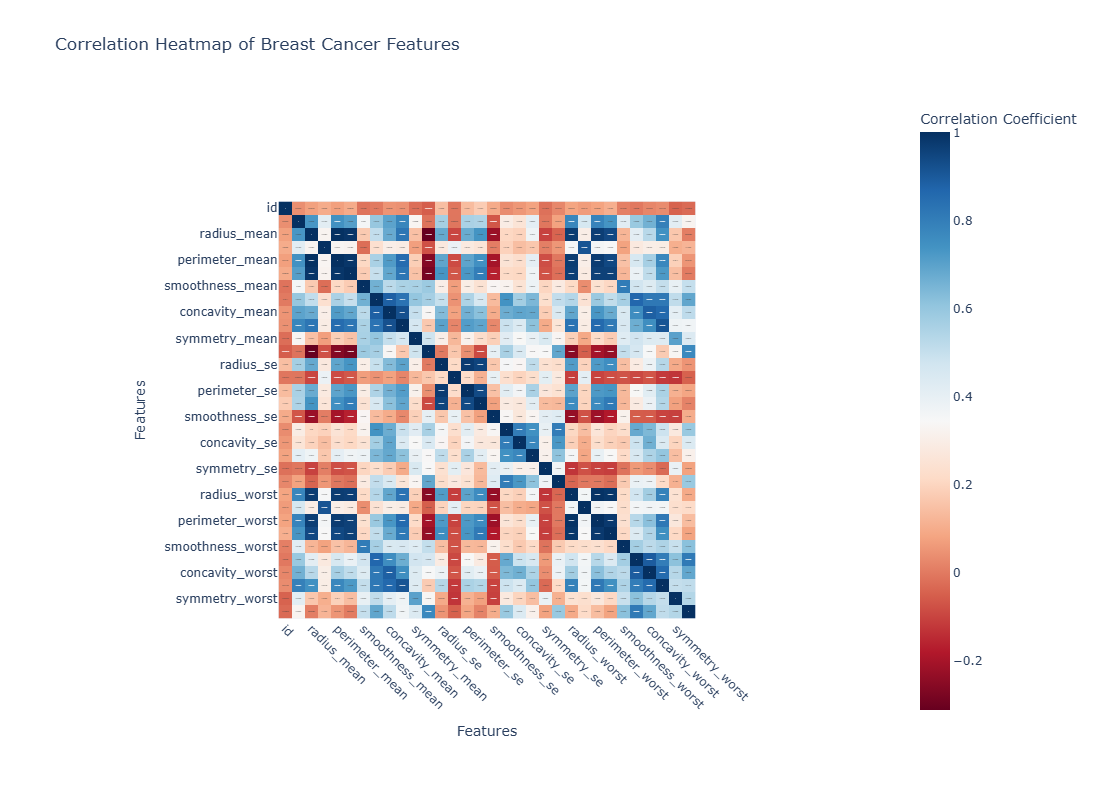

In [97]:
import pandas as pd
import plotly.express as px

# Select only the numeric columns for correlation
numeric_cols = breastcancer.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
correlation_matrix = breastcancer[numeric_cols].corr()

# Create a heatmap using Plotly
fig = px.imshow(correlation_matrix,
                text_auto=True,
                color_continuous_scale='RdBu',
                title='Correlation Heatmap of Breast Cancer Features',
                labels=dict(x="Features", y="Features", color="Correlation Coefficient"))

# Update layout for better visualization
fig.update_layout(
    width=800,
    height=800,
    xaxis=dict(tickangle=45),  # Rotate x-axis labels for better readability
    yaxis=dict(tickangle=0)    # Set y-axis labels to horizontal
)

# Show the interactive heatmap
fig.show()



If your first thought is *"Woah, this is a bit much. Are you sure this is even useful?"* - **don't fret. That's the reaction I was aiming for.** 

I've made the plot interactive if you wish to scrub through it, but I think we can do better. This analysis needs to **get to the point, right?**

To that end, the main reason I've provided this heatmap of the breast cancer dataset to explain why we should use feature selection on it. 

Originally, I **tried PCA**, but this happened:

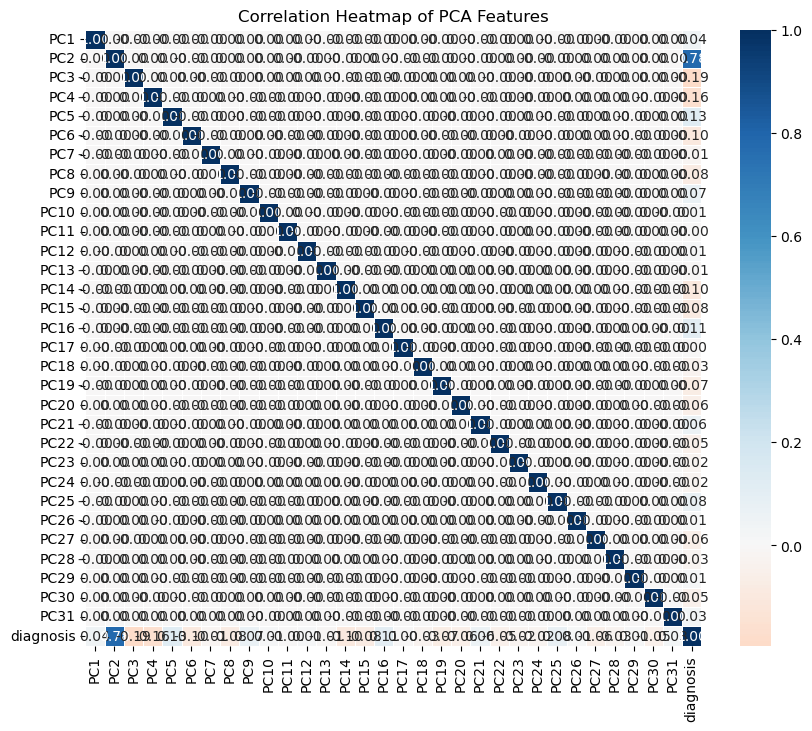

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Select only the numeric columns for PCA
numeric_cols = breastcancer.select_dtypes(include=['float64', 'int64']).columns

# Separate the features and target variable
X = breastcancer[numeric_cols].drop('diagnosis', axis=1)  # Features
y = breastcancer['diagnosis']  # Target variable

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Create a DataFrame with PCA results
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
pca_df = pd.DataFrame(X_pca, columns=pca_columns)

# Add the target variable to the PCA DataFrame
pca_df['diagnosis'] = y

# Calculate the correlation matrix of the PCA features
correlation_matrix = pca_df.corr()

# Create a heatmap of the PCA correlation features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='RdBu', center=0, square=True, linewidths=0.5)
plt.title('Correlation Heatmap of PCA Features')
plt.show()


Well, that isn't very useful. Hence why I went with **Random Forest**:

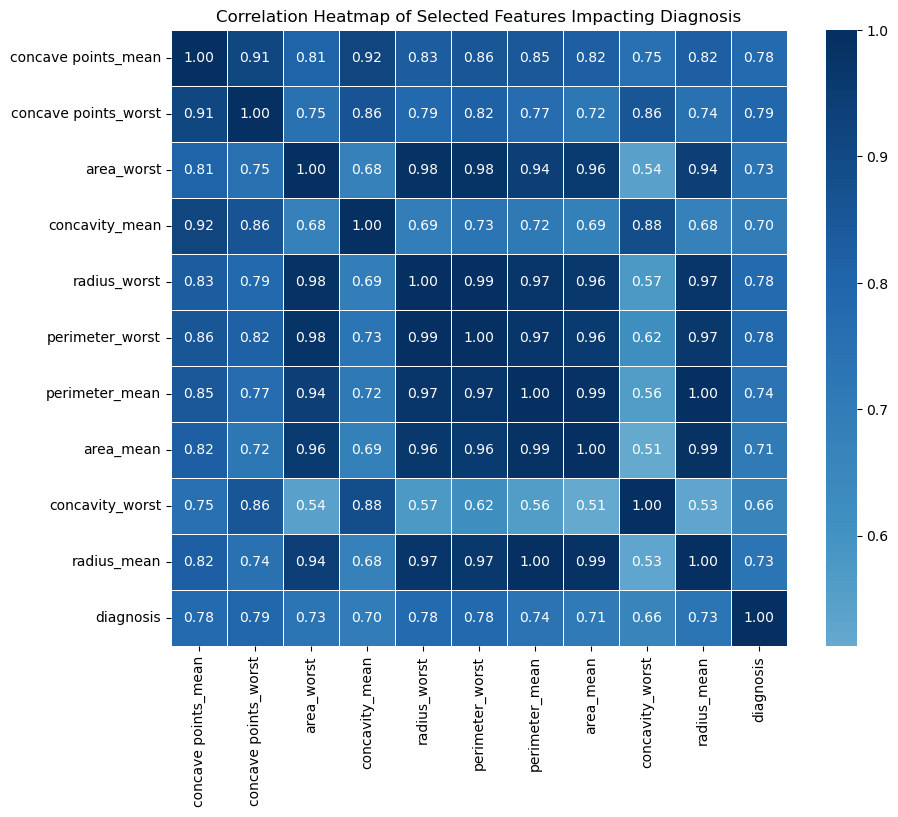

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Separate the features and target variable
X = breastcancer.drop(columns=['id', 'diagnosis'])  # Features
y = breastcancer['diagnosis']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Select top N features based on importance
top_n = 10  # Specify how many top features to select
top_features = importance_df.nlargest(top_n, 'Importance')['Feature'].values

# Create a new DataFrame with selected features
selected_features_df = breastcancer[top_features.tolist() + ['diagnosis']]

# Calculate the correlation matrix of the selected features
correlation_matrix = selected_features_df.corr()

# Create a heatmap of the correlation features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='RdBu', center=0, square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features Impacting Diagnosis')
plt.show()



**There** we go! Now we have a much nicer heatmap that looks like what we were aiming for.

This section is called **EDA Part 1** for a reason- I *promise* we'll be getting to the insights (and more visualizations) shortly. 

Before we do that, though, remember how I said I'd talk **more about missingness and imputation?**

While the second part of our EDA (and, therefore, the conclusions of the project itself) will settle on a way forward and go from there, be sure to check out the **final section of the project** for some **important discussion** on alternative methods and thoughts on the project's application as a whole.

We'll copy our trimmed down breast cancer dataframe so the original isn't modified, introduce some fake missingness and do some analysis:

In [111]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error
import random

# Step 1: Copy the selected_features_df
selected_features_copy = selected_features_df.copy()

# Step 2: Introduce fake missingness
# Set a random seed for reproducibility
np.random.seed(42)

# Create a missingness mask where 10% of the data is randomly set to NaN
missing_mask = np.random.rand(*selected_features_copy.shape) < 0.1
X_with_missing = selected_features_copy.mask(missing_mask)

# Step 3: Imputation

# Mean Imputation
mean_imputer = SimpleImputer(strategy='mean')
X_mean_imputed = pd.DataFrame(mean_imputer.fit_transform(X_with_missing), columns=selected_features_copy.columns)

# KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
X_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(X_with_missing), columns=selected_features_copy.columns)

# Increase max_iter in IterativeImputer to allow more iterations
mice_imputer = IterativeImputer(random_state=42, max_iter=20)  # Adjust max_iter as needed
X_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(X_with_missing), columns=selected_features_copy.columns)

# Step 4: Evaluate MSE

# Define a function to evaluate the imputation
def evaluate_imputation(original, imputed, mask):
    original_masked = original[mask]
    imputed_masked = imputed[mask]
    
    # Ensure there are values to compare
    if original_masked.size == 0 or imputed_masked.size == 0:
        print("Warning: No imputed values to compare. Check the mask and imputation process.")
    
    # Calculate the MSE on the values that were originally missing
    return mean_squared_error(original_masked, imputed_masked)

# Evaluate only the values that were originally missing
mse_mean = evaluate_imputation(selected_features_copy.values, X_mean_imputed.values, missing_mask)
mse_knn = evaluate_imputation(selected_features_copy.values, X_knn_imputed.values, missing_mask)
mse_mice = evaluate_imputation(selected_features_copy.values, X_mice_imputed.values, missing_mask)

# Step 5: Print results
print("MSE for Mean Imputation:", mse_mean)
print("MSE for KNN Imputation:", mse_knn)
print("MSE for MICE Imputation:", mse_mice)


MSE for Mean Imputation: 0.9934825150121435
MSE for KNN Imputation: 0.06037813939440714
MSE for MICE Imputation: 0.023446561911477794


C:\Users\chimc\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



Well **that's** interesting! Mean imputation, which replaces missing values with the mean of each feature, results in the highest MSE- by **far.** This is because mean imputation oversimplifies the data by ignoring the relationships between features, leading to distorted results. As a result, the imputed values significantly deviate from the true data, reflected in the MSE value of nearly 1- that's basically **Completely Wrong**. 

KNN imputation performs better, yielding a **much** lower MSE. This method looks at the nearest neighbors in the dataset and fills in missing values based on patterns in similar data points. KNN captures local relationships between variables, which leads to a more accurate estimation of the missing values compared to mean imputation. However, it may still fall short in capturing broader patterns or when data is sparse, but overall, it actually does quite good!

The winner, however, is MICE, which produces the lowest MSE among the methods, suggesting it offers the **most accurate imputation**. By iteratively modeling missing data using all other features, MICE maintains the relationships between variables more effectively than both mean and KNN imputation. This iterative process allows for better handling of complex datasets, ensuring that the imputed values closely resemble the true data. MICE’s ability to account for interactions and variability in the dataset results in the most reliable imputation, reflected in its minimal MSE, making it the best option in this comparison.

As interesting as this all is, it's probably best **for the sake of this project** to just **stick with the real data** since it's already so clean! So **why discuss the missingness at all?**

First of all, data is **not** always going to be this clean. It's practically a given that further cancer research (and possibly the final version of this very project) will include missingness. By doing this now, we've learned what the best method for imputation is- and that's a **very** good thing to know. Additionally, studying the effects of introduced missingness on the overall dataset can help identify which variables are crucial for accurate imputation and model performance. This process can highlight key features that may strongly influence the outcome variable and are, therefore, critical for predictive modeling. Check this out:

Most Significant Features Influencing Diagnosis Based on MICE Imputation:
                           MSE  Correlation
concave points_worst  0.049668     0.794110
perimeter_worst       0.010938     0.780893
concave points_mean   0.018157     0.779064
radius_worst          0.009994     0.775582
perimeter_mean        0.001109     0.742865
area_worst            0.018127     0.735520
radius_mean           0.002554     0.728531
area_mean             0.008522     0.708895
concavity_mean        0.039963     0.696581
concavity_worst       0.055612     0.664223
diagnosis             0.055235          NaN


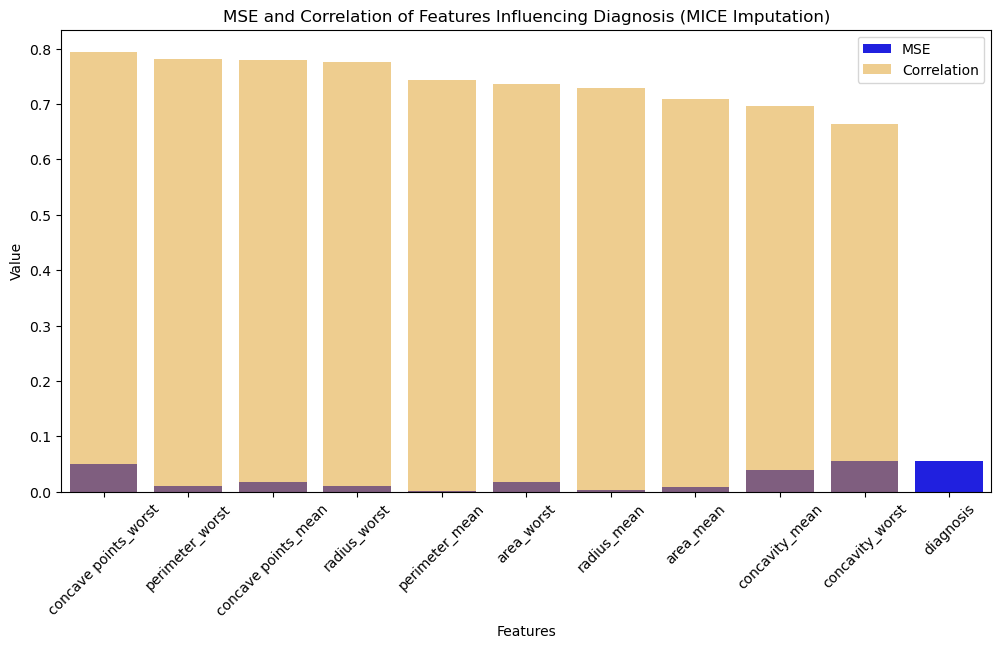

In [113]:
# Calculate correlation coefficients with diagnosis after MICE imputation
mice_imputed_with_diagnosis = X_mice_imputed.copy()
mice_imputed_with_diagnosis['diagnosis'] = selected_features_copy['diagnosis'].values  # Add diagnosis back

# Calculate correlation
correlation_matrix_mice = mice_imputed_with_diagnosis.corr()
diagnosis_correlations_mice = correlation_matrix_mice['diagnosis'].drop('diagnosis')  # Drop diagnosis itself

# Combine MSE results with correlation results
mse_and_correlation = pd.DataFrame({
    'MSE': mse_results['MICE Imputation'],  # Assuming mse_results is a DataFrame with MICE MSE values
    'Correlation': diagnosis_correlations_mice
})

# Sort by absolute correlation value
mse_and_correlation['Abs_Correlation'] = mse_and_correlation['Correlation'].abs()
significant_features_mice = mse_and_correlation.sort_values(by='Abs_Correlation', ascending=False)

# Display the most significant features influencing diagnosis based on MICE imputation
print("Most Significant Features Influencing Diagnosis Based on MICE Imputation:")
print(significant_features_mice[['MSE', 'Correlation']])

# Optional: Visualize the MSE and Correlation
plt.figure(figsize=(12, 6))
sns.barplot(x=significant_features_mice.index, y='MSE', data=significant_features_mice, color='blue', label='MSE')
sns.barplot(x=significant_features_mice.index, y='Correlation', data=significant_features_mice, color='orange', label='Correlation', alpha=0.5)
plt.xticks(rotation=45)
plt.title('MSE and Correlation of Features Influencing Diagnosis (MICE Imputation)')
plt.ylabel('Value')
plt.xlabel('Features')
plt.legend()
plt.show()


You might be wondering why the MSE appears highest for the most correlated variable. As said before, this indicates the variable's importance- what we're seeing is likely because it's a **key variable influencing other features or the target variable (diagnosis)**, making accurate imputation of this feature essential. When it is missing, the imputation methods (especially more complex ones like MICE) rely heavily on the relationships between it and other features to estimate its values. If the estimates are not accurate, this can lead to greater discrepancies and thus a higher MSE.

Alright. I still haven't forgotten about the merging of the two datasets, which we'll do in just a moment. 

There's **one** more thing to consider first before we get to the meat of this project (and therefore the rest of the EDA):

Early on in our IDA, this major imbalance appeared in the peptides dataset:

inactive - virtual    0.790306

One way to handle that would be with **SMOTE**, and it might be a good idea. Why? Because such a stark class imbalance can lead to biased models that heavily favor the majority class (inactive - virtual) at the expense of the minority classes, particularly very active.

Let's take a look at what happens when we bring SMOTE into things:

In [119]:
# Import necessary libraries
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter

# Define features and target
X = peptides_b.drop(columns=['ID', 'sequence'])  # Dropping 'ID' and 'sequence' as they are not features for SMOTE
y = peptides_b[['class_inactive - virtual', 'class_mod. active', 'class_very active']]  # The one-hot encoded class columns

# Reshape the target y back into a single column, converting the one-hot encoded labels back into class labels
y_flat = y.idxmax(axis=1)  # idxmax gives the column name with the highest value, simulating the original class labels

# Check original class distribution
print("Original class distribution:", Counter(y_flat))

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_flat)

# Check the new class distribution after SMOTE
print("Resampled class distribution:", Counter(y_resampled))

# Convert the resampled target labels back into one-hot encoding
y_resampled_one_hot = pd.get_dummies(y_resampled)

# Combine resampled data into a new DataFrame
peptides_b_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), y_resampled_one_hot], axis=1)

# Display the resampled dataset (optional)
peptides_b_resampled


Original class distribution: Counter({'class_inactive - virtual': 833, 'class_mod. active': 98, 'class_very active': 18})
Resampled class distribution: Counter({'class_mod. active': 833, 'class_inactive - virtual': 833, 'class_very active': 833})


,class_inactive - virtual,class_mod. active,class_very active,class_inactive - virtual,class_mod. active,class_very active
0,0,1,0,False,True,False
1,0,1,0,False,True,False
2,0,1,0,False,True,False
3,0,1,0,False,True,False
4,0,1,0,False,True,False
...,...,...,...,...,...,...
2494,0,0,1,False,False,True
2495,0,0,1,False,False,True
2496,0,0,1,False,False,True
2497,0,0,1,False,False,True


Pretty neat, huh?

Well, yes, but now we're working with **huge quantities of fake data**. 

Considering the goal of this project, I'm choosing to **leave SMOTE and fake missingness/imputation out of the analysis in the next part**. However, I felt it was important to include them here- see the conclusions section for more detailed thoughts.

**I am willing to reconsider my stance on these for the final project.**

Anyways, it's finally time to create the cancer type colummn so we can merge the (feature-selected) breast cancer dataset with the (encoded) peptides dataset. 

In [120]:
# Add the 'cancer_type' column to both datasets
selected_features_copy['cancer_type'] = 'breast'
peptides_b['cancer_type'] = 'breast'

# Merge the datasets on the 'cancer_type' column
merged_dataset = pd.merge(selected_features_copy, peptides_b, on='cancer_type')

# Display the merged dataset
print(merged_dataset.head())


   concave points_mean  concave points_worst  area_worst  concavity_mean  \
0             2.532475              2.296076    2.001237        2.652874   
1             2.532475              2.296076    2.001237        2.652874   
2             2.532475              2.296076    2.001237        2.652874   
3             2.532475              2.296076    2.001237        2.652874   
4             2.532475              2.296076    2.001237        2.652874   

   radius_worst  perimeter_worst  perimeter_mean  area_mean  concavity_worst  \
0       1.88669         2.303601        1.269934   0.984375         2.109526   
1       1.88669         2.303601        1.269934   0.984375         2.109526   
2       1.88669         2.303601        1.269934   0.984375         2.109526   
3       1.88669         2.303601        1.269934   0.984375         2.109526   
4       1.88669         2.303601        1.269934   0.984375         2.109526   

   radius_mean  diagnosis cancer_type  ID                 sequ

# 4.) Visualizations and Insights (EDA Part 2)

We've been at this for a bit. Still with me?

Hopefully so, because here comes the **juicy part**- it's time to start visualizing and drawing insights now that we've got our merged and edited dataset ready to go.

Before we use that merged dataset, though, I have one more use for the unmerged ones- **linear regression**.

In [126]:
# Separate features and target in the selected_features_df dataset
X_cancer = selected_features_df.drop(columns=['diagnosis'])  # Independent variables
y_cancer = selected_features_df['diagnosis']  # Target variable

# Add a constant to the model (intercept)
X_cancer = sm.add_constant(X_cancer)

# Fit the linear regression model
cancer_model = sm.OLS(y_cancer, X_cancer).fit()

# Print the summary of the linear regression results
print(cancer_model.summary())


                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     150.6
Date:                Wed, 16 Oct 2024   Prob (F-statistic):          2.30e-151
Time:                        18:17:36   Log-Likelihood:                -21.694
No. Observations:                 569   AIC:                             65.39
Df Residuals:                     558   BIC:                             113.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3726 